In [1]:
import numpy as np
from scipy import signal

A = np.array([[2,1,3,0],[1,1,0,5],[3,3,1,0],[2,0,0,2]])
M = np.array([[1,0,2],[2,1,0],[1,0,3]])

In [2]:
B = signal.convolve2d(A, M, mode='same', boundary='fill')
print (B)

[[ 5  9 10  0]
 [ 7 17 19 16]
 [10 12 11  0]
 [ 5 10 13  5]]


In [3]:
B1 = signal.convolve2d(A, M, mode='valid')
print(B1)

[[17 19]
 [12 11]]


In [4]:
B2 = signal.convolve2d(A, M, mode='full')
print(B2)

[[ 2  1  7  2  6  0]
 [ 5  5  9 10  0 10]
 [ 7  7 17 19 16  0]
 [ 9 10 12 11  0 19]
 [ 7  5 10 13  5  0]
 [ 2  0  6  2  0  6]]


In [5]:
def max_pooling(A,k):
    n, p = A.shape
    B = A.reshape(n//k,k,p//k,k)
    C = B.transpose((0, 2, 1, 3))
    D = C.max(axis=(2,3))
    return D

In [6]:
R = np.array([[16, 23, 22, 21, 12, 13],[0, 5, 18, 2, 17, 15],[10, 20, 4, 9, 7, 8],[11, 14, 1, 19, 6, 3]])
print(max_pooling(R,2))

[[23 22 17]
 [20 19  8]]


In [7]:
def average_pooling(A,k):
    n, p = A.shape
    B = A.reshape(n//k,k,p//k,k)
    C = B.transpose((0, 2, 1, 3))
    D = C.mean(axis=(2,3))
    return D

In [8]:
print(average_pooling(R,2))

[[11.   15.75 14.25]
 [13.75  8.25  6.  ]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Partie A - Importer une image comme un tableau
import imageio.v3 as iio

A = iio.imread('image_avant.png')
# Partie B - Motif de convolution
M = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])
# Partie C - Calcul de la convolution

from scipy import signal
B = signal.convolve2d(A, M, boundary='fill', mode='same')
# Partie D - Affichage des images avant/après

fig = plt.figure(figsize = (10,5))
ax = plt.subplot(1,2,1)
ax.set_title("Image originale")
ax.imshow(A, cmap='gray')
bx = plt.subplot(1,2,2)
bx.set_title("Image sortie")
bx.imshow(B, cmap='gray')
plt.show()
# Partie E - Sauvegarde de l'image
B = np.clip(B,0,255) # limite les valeurs entre 0 et 255
B = B.astype(np.uint8) # conversion en entiers
iio.imwrite('image_apres.png', B)

ModuleNotFoundError: No module named 'imageio'

In [2]:
!from openpiv import tools, pyprocess, validation, filters, scaling

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import imageio
import importlib_resources
!import pathlib

zsh:1: command not found: from


ModuleNotFoundError: No module named 'imageio'

In [5]:
f = np.array([1,0,3,5,1])
g = np.array([1,2,3])
h = np.convolve(f,g,'same')

In [6]:
h

array([ 2,  6, 11, 20, 17])

In [7]:
h = np.convolve(f,g,'full')

In [8]:
h

array([ 1,  2,  6, 11, 20, 17,  3])

In [21]:
N = 100
f = np.sin(np.linspace(0,2*np.pi,N)) + np.random.random(N)
g = 1/5*np.array([1,1,1,1,1])

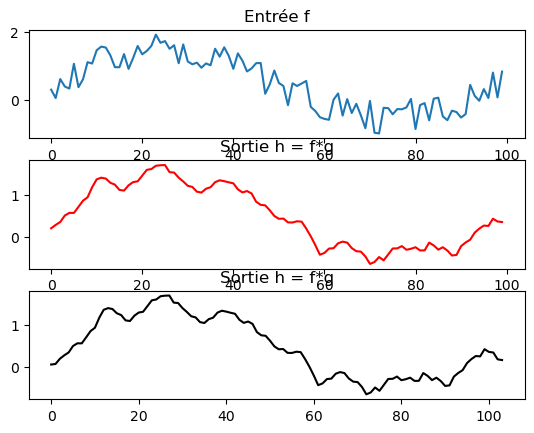

In [22]:
h = np.convolve(f,g,'same')
i = np.convolve(f,g,'full')
ax = plt.subplot(3,1,1)
ax.set_title("Entrée f")
plt.plot(f)
ax = plt.subplot(3,1,2)
ax.set_title("Sortie h = f*g")
plt.plot(h,color='red')
ax = plt.subplot(3,1,3)
ax.set_title("Sortie h = f*g")
plt.plot(i,color='black')
plt.show()